## AuxTel test LTS-337-016 (Tracking)

In this notebook, we check the tracking accuracy of the telescope by taking a series of 20 images over a 10 minute period.  Desired specs:

| Description | Value       | Unit          |   Name     |
| :---        |    :----:   |       :----:  |       ---: |
|The Auxiliary Telescope shall have a open-loop tracking accuracy over a 10 minute interval within the tracking range of:     | 2.0       | Arcsec RMS   |Aux_Tel_Tel_Track_Error|
The Auxiliary Telescope shall have the ability to track for a minimum time of: | 10| Minutes |Aux_Tel_Max_track_time|
|The Auxiliary Telescope shall be able to track in azimuth over the angular range of:|+/- 270       | Degrees     |Aux_Tel_Az_Track_Range|
|Tracking Range in elevation shall be at least:   | 20-86.5|Degrees|Aux_Tel_El_Track_Range_High|

In [345]:
import sys, time, os, asyncio
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.dates as mdates

from astropy.time import Time, TimeDelta
from astropy.coordinates import SkyCoord, AltAz, ICRS, EarthLocation, Angle, FK5
import astropy.units as u
from lsst.pipe.tasks.quickFrameMeasurement import QuickFrameMeasurementTask
import lsst.daf.persistence as dafPersist

import pandas as pd

In [346]:
# Set Cerro Pachon location and observation time
location = EarthLocation.from_geodetic(lon=-70.749417*u.deg,
                                       lat=-30.244639*u.deg,
                                       height=2663.0*u.m)

In [347]:
REPO_DIR = '/project/shared/auxTel/rerun/quickLook'
butler = dafPersist.Butler(REPO_DIR)

# Get the start and end times

In [13]:
# Get the start and end time
firstExpIds = [[2021090700298, 13], [2021090700301, 21], [2021090700325,20], [2021090700360,40], [2021090700400, 40], [2021090700454, 80], [2021090700534, 80], [2021090800324, 60], [2021090800263, 60]]
#numExp = 2
positionData = {}
qm_config = QuickFrameMeasurementTask.ConfigClass()
qm = QuickFrameMeasurementTask(config=qm_config)

for firstExpId in firstExpIds:
    print('Empezamos con la', firstExpId[0])
    data = {}
    tStart = []
    tEnd = []
    source = []
    numExp = firstExpId[1]
    for i in range(numExp):
        expId = firstExpId[0] + i
        exp = butler.get('quickLookExp', detector=0, expId=expId)
        mData = exp.getMetadata()
        tStart.append(mData['DATE-BEG'])
        tEnd.append(mData['DATE-END'])
        source.append(mData['OBJECT'])
    data['StartTime'] = tStart
    data['EndTime'] = tEnd
    data['Source'] = source
    positionData[firstExpId[0]] = data
               
               
print(positionData)

Empezamos con la 2021090700298


Ignoring translator header fixup of LATISS AT_O_20210907_000298: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000299: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000300: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000301: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000302: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000303: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000304: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000305: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000306: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000307: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000308: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000309: 

Empezamos con la 2021090700301


Ignoring translator header fixup of LATISS AT_O_20210907_000301: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000302: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000303: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000304: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000305: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000306: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000307: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000308: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000309: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000310: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000311: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000312: 

Empezamos con la 2021090700325


Ignoring translator header fixup of LATISS AT_O_20210907_000325: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000326: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000327: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000328: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000329: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000330: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000331: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000332: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000333: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000334: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000335: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000336: 

Empezamos con la 2021090700360


Ignoring translator header fixup of LATISS AT_O_20210907_000360: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000361: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000362: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000363: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000364: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000365: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000366: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000367: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000368: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000369: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000370: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000371: 

Empezamos con la 2021090700400


Ignoring translator header fixup of LATISS AT_O_20210907_000400: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000401: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000402: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000403: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000404: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000405: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000406: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000407: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000408: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000409: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000410: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000411: 

Empezamos con la 2021090700454


Ignoring translator header fixup of LATISS AT_O_20210907_000454: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000455: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000456: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000457: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000458: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000459: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000460: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000461: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000462: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000463: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000464: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000465: 

Empezamos con la 2021090700534


Ignoring translator header fixup of LATISS AT_O_20210907_000534: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000535: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000536: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000537: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000538: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000539: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000540: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000541: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000542: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000543: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000544: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000545: 

Empezamos con la 2021090800324


Ignoring translator header fixup of LATISS AT_O_20210908_000324: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000325: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000326: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000327: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000328: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000329: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000330: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000331: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000332: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000333: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000334: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000335: 

Empezamos con la 2021090800263


Ignoring translator header fixup of LATISS AT_O_20210908_000263: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000264: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000265: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000266: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000267: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000268: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000269: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000270: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000271: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000272: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000273: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000274: 

{2021090700298: {'StartTime': ['2021-09-08T05:50:44.216', '2021-09-08T05:51:22.323', '2021-09-08T05:52:00.330', '2021-09-08T05:55:26.980', '2021-09-08T05:55:44.551', '2021-09-08T05:56:02.119', '2021-09-08T05:56:19.688', '2021-09-08T05:56:37.243', '2021-09-08T05:56:54.815', '2021-09-08T05:57:12.376', '2021-09-08T05:57:29.944', '2021-09-08T05:57:47.509', '2021-09-08T05:58:05.077'], 'EndTime': ['2021-09-08T05:50:49.443', '2021-09-08T05:51:27.555', '2021-09-08T05:52:05.561', '2021-09-08T05:55:42.221', '2021-09-08T05:55:59.781', '2021-09-08T05:56:17.348', '2021-09-08T05:56:34.913', '2021-09-08T05:56:52.476', '2021-09-08T05:57:10.046', '2021-09-08T05:57:27.612', '2021-09-08T05:57:45.172', '2021-09-08T05:58:02.742', '2021-09-08T05:58:20.310'], 'Source': ['HD 205489', 'HD 205489', 'HD 205489', 'HD 205489', 'HD 205489', 'HD 205489', 'HD 205489', 'HD 205489', 'HD 205489', 'HD 205489', 'HD 205489', 'HD 205489', 'HD 205489']}, 2021090700301: {'StartTime': ['2021-09-08T05:55:26.980', '2021-09-08T05

In [29]:
import json
#json.dump(positionData, a_file)
f = open("b_file","w")

f.write(json.dumps(positionData))

# close file
f.close()


In [199]:
# Reconstructing the dictionary from the b_file that contains the #importing the module
import json
  
# reading the data from the file
with open('b_file') as f:
    data = f.read()
  
print("Data type before reconstruction : ", type(data))
      
# reconstructing the data as a dictionary
positionData = json.loads(data)
  
print("Data type after reconstruction : ", type(positionData))
print(positionData)

Data type before reconstruction :  <class 'str'>
Data type after reconstruction :  <class 'dict'>
{'2021090700298': {'StartTime': ['2021-09-08T05:50:44.216', '2021-09-08T05:51:22.323', '2021-09-08T05:52:00.330', '2021-09-08T05:55:26.980', '2021-09-08T05:55:44.551', '2021-09-08T05:56:02.119', '2021-09-08T05:56:19.688', '2021-09-08T05:56:37.243', '2021-09-08T05:56:54.815', '2021-09-08T05:57:12.376', '2021-09-08T05:57:29.944', '2021-09-08T05:57:47.509', '2021-09-08T05:58:05.077'], 'EndTime': ['2021-09-08T05:50:49.443', '2021-09-08T05:51:27.555', '2021-09-08T05:52:05.561', '2021-09-08T05:55:42.221', '2021-09-08T05:55:59.781', '2021-09-08T05:56:17.348', '2021-09-08T05:56:34.913', '2021-09-08T05:56:52.476', '2021-09-08T05:57:10.046', '2021-09-08T05:57:27.612', '2021-09-08T05:57:45.172', '2021-09-08T05:58:02.742', '2021-09-08T05:58:20.310'], 'Source': ['HD 205489', 'HD 205489', 'HD 205489', 'HD 205489', 'HD 205489', 'HD 205489', 'HD 205489', 'HD 205489', 'HD 205489', 'HD 205489', 'HD 205489',

In [404]:
firstExpIds = [[2021090700298, 13], [2021090700301, 21], [2021090700325,20], [2021090700360,40], [2021090700400, 40], [2021090700454, 80], [2021090700534, 80], [2021090800324, 60], [2021090800263, 60]]
for firstExpId in firstExpIds:
    iden = str(firstExpId[0])
    start_time = Time(positionData[iden]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(positionData[iden]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
    
    print('{} tracking test started at {} and finished at {} for a total duration of {} min'.format(iden, positionData[iden]['StartTime'][0], positionData[iden]['EndTime'][-1], round(duration,1)))

2021090700298 tracking test started at 2021-09-08T05:50:44.216 and finished at 2021-09-08T05:58:20.310 for a total duration of 7.6 min
2021090700301 tracking test started at 2021-09-08T05:55:26.980 and finished at 2021-09-08T06:01:33.559 for a total duration of 6.1 min
2021090700325 tracking test started at 2021-09-08T06:11:42.182 and finished at 2021-09-08T06:17:31.167 for a total duration of 5.8 min
2021090700360 tracking test started at 2021-09-08T06:47:33.263 and finished at 2021-09-08T07:00:47.986 for a total duration of 13.2 min
2021090700400 tracking test started at 2021-09-08T07:19:07.502 and finished at 2021-09-08T07:31:37.511 for a total duration of 12.5 min
2021090700454 tracking test started at 2021-09-08T08:41:42.767 and finished at 2021-09-08T09:06:46.245 for a total duration of 25.1 min
2021090700534 tracking test started at 2021-09-08T09:10:47.862 and finished at 2021-09-08T09:35:52.911 for a total duration of 25.1 min
2021090800324 tracking test started at 2021-09-09T0

In [405]:
expId = 2021090700294
exp = butler.get('quickLookExp', detector=0, expId=expId)
mData = exp.getMetadata()
print(mData)

Ignoring translator header fixup of LATISS AT_O_20210907_000294: 'MJD-OBS not found'


COMMENT = [ "= '        '", "---- Date, night and basic image information ----", "= '        '", "---- Telescope info, location, observer ----", "= '        '", "---- Pointing info, etc. ----", "= '        '", "---- TAN Projection ----", "= '        '", "---- Image-identifying used to build OBS-ID ----", "= '        '", "---- Test Stand information ----", "= '        '", "---- Information from Camera (Common block) ----", "= '        '", "---- Information from Camera ----", "= '        '", "---- Filter/grating information ----", "= '        '", "---- Exposure-related information ----", "= '        '", "---- Weather information ----", "= '        '", "---- Header information ----", "= '        '", "---- Checksums ----", "---- Information from Camera per sensor ----", "= '        '", "---- Geometry from Camera ----" ]
ORIGIN = "LSST DM Header Service"
// FITS file originator
DATE = "2021-09-08T05:33:48.280"
// Creation Date and Time of File
DATE-BEG = "2021-09-08T05:34:17.424"
// Time at

Ignoring translator header fixup of LATISS AT_O_20210907_000302: 'MJD-OBS not found'


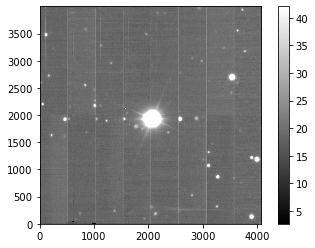

Struct(success=True; brightestObjCentroid=(2058.6323100389495, 1927.4521415969004); brightestObjCentroidCofM=(2058.321583516316, 1927.5804711142125); brightestObj_xXyY=(0.7174572127610885, 0.654536756211314); brightestObjApFlux70=193375654.1268921; brightestObjApFlux25=127571785.84765625; medianXxYy=(3.121910633121908, 3.0270233577569656))


In [9]:
qm_config = QuickFrameMeasurementTask.ConfigClass()
qm = QuickFrameMeasurementTask(config=qm_config)
primera = 20210907003
exp = butler.get('quickLookExp', detector=0, expId=primera)
plt.imshow(exp.image.array,cmap='gray',origin='lower',vmin=np.percentile(exp.image.array,5),vmax=np.percentile(exp.image.array,98))
plt.colorbar()
plt.show()
result = qm.run(exp)
print(result)

# Extract metadata from the headers for each tracking test longer than 10 minutes

In [90]:
firstExpIds = [[2021090700360,40], [2021090700400, 40], [2021090700454, 40], [2021090700493, 40], [2021090700534, 40], [2021090700573, 40], [2021090800263, 40], [2021090800324, 40]]
posData = {}
qm_config = QuickFrameMeasurementTask.ConfigClass()
qm = QuickFrameMeasurementTask(config=qm_config)

for firstExpId in firstExpIds:
    print('Empezamos con la', firstExpId[0])
    data = {}
    centroids = []
    els = []
    azs = []
    decs = []
    ras = []
    rotpas = []
    tStart = []
    tEnd = []
    source = []

    numExp = firstExpId[1]
    for i in range(numExp):
        expId = firstExpId[0] + i
        exp = butler.get('quickLookExp', detector=0, expId=expId)
        result = qm.run(exp)
        centroids.append(result.brightestObjCentroid)
        mData = exp.getMetadata()
        els.append(mData['ELSTART'])
        azs.append(mData['AZSTART'])
        decs.append(mData['DECSTART'])
        ras.append(mData['RASTART'])
        rotpas.append(mData['ROTPA'])
        tStart.append(mData['DATE-BEG'])
        tEnd.append(mData['DATE-END'])
        source.append(mData['OBJECT'])
    data['Elevation'] = els
    data['Azimuth'] = azs
    data['Dec'] = decs
    data['RA'] = ras
    data['ROTPA'] = rotpas
    data['Centroids'] = centroids
    data['StartTime'] = tStart
    data['EndTime'] = tEnd
    data['Source'] = source
    posData[firstExpId[0]] = data

Empezamos con la 2021090700360


Ignoring translator header fixup of LATISS AT_O_20210907_000360: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000361: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000362: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000363: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000364: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000365: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000366: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000367: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000368: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000369: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000370: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000371: 

Empezamos con la 2021090700400


Ignoring translator header fixup of LATISS AT_O_20210907_000400: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000401: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000402: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000403: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000404: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000405: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000406: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000407: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000408: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000409: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000410: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000411: 

Empezamos con la 2021090700493


Ignoring translator header fixup of LATISS AT_O_20210907_000493: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000494: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000495: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000496: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000497: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000498: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000499: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000500: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000501: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000502: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000503: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000504: 

Empezamos con la 2021090700534


Ignoring translator header fixup of LATISS AT_O_20210907_000534: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000535: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000536: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000537: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000538: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000539: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000540: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000541: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000542: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000543: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000544: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000545: 

Empezamos con la 2021090700573


Ignoring translator header fixup of LATISS AT_O_20210907_000573: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000574: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000575: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000576: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000577: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000578: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000579: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000580: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000581: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000582: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000583: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000584: 

Empezamos con la 2021090800263


Ignoring translator header fixup of LATISS AT_O_20210908_000263: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000264: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000265: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000266: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000267: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000268: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000269: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000270: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000271: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000272: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000273: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000274: 

Empezamos con la 2021090800324


Ignoring translator header fixup of LATISS AT_O_20210908_000324: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000325: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000326: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000327: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000328: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000329: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000330: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000331: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000332: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000333: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000334: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210908_000335: 

In [406]:
# Use only the first 10 minutes for the test 
firstExpIds = [[2021090700360,32], [2021090700400, 32], [2021090700454, 32], [2021090700493, 32], [2021090700534, 32], [2021090700573, 32], [2021090800263, 32], [2021090800324, 32]]
posData = {}
qm_config = QuickFrameMeasurementTask.ConfigClass()
qm = QuickFrameMeasurementTask(config=qm_config)

for firstExpId in firstExpIds:
    print('Empezamos con la', firstExpId[0])
    data = {}
    centroids = []
    els = []
    azs = []
    decs = []
    ras = []
    rotpas = []
    tStart = []
    tEnd = []
    source = []

    numExp = firstExpId[1]
    for i in range(numExp):
        expId = firstExpId[0] + i
        exp = butler.get('quickLookExp', detector=0, expId=expId)
        result = qm.run(exp)
        centroids.append(result.brightestObjCentroid)
        mData = exp.getMetadata()
        els.append(mData['ELSTART'])
        azs.append(mData['AZSTART'])
        decs.append(mData['DECSTART'])
        ras.append(mData['RASTART'])
        rotpas.append(mData['ROTPA'])
        tStart.append(mData['DATE-BEG'])
        tEnd.append(mData['DATE-END'])
        source.append(mData['OBJECT'])
    data['Elevation'] = els
    data['Azimuth'] = azs
    data['Dec'] = decs
    data['RA'] = ras
    data['ROTPA'] = rotpas
    data['Centroids'] = centroids
    data['StartTime'] = tStart
    data['EndTime'] = tEnd
    data['Source'] = source
    posData[firstExpId[0]] = data

Empezamos con la 2021090700360


Ignoring translator header fixup of LATISS AT_O_20210907_000360: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000361: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000362: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000363: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210907_000364: 'MJD-OBS not found'


KeyboardInterrupt: 

# Write data into a file / Recover data from file

In [367]:
#json.dump(positionData, a_file)
f = open("posData10min_file","w")

f.write(json.dumps(posData))

# close file
f.close()


In [407]:
# Recover posData dictionary from file posData_file:
import json
  
# reading the data from the file
with open('posData10min_file') as f:
    data = f.read()
  
print("Data type before reconstruction : ", type(data))
      
# reconstructing the data as a dictionary
posData = json.loads(data)
  
print("Data type after reconstruction : ", type(posData))
print(posData)

Data type before reconstruction :  <class 'str'>
Data type after reconstruction :  <class 'dict'>
{'2021090700360': {'Elevation': [59.4045226856106, 59.3487018926971, 59.2928055508964, 59.2369516774052, 59.177933691346, 59.1246229990356, 59.0655553921097, 59.0119062944286, 58.9555097206467, 58.8989589198463, 58.842258362376, 58.785559593045, 58.7287562175625, 58.67188444575, 58.6148298366898, 58.5577640517586, 58.5005909784668, 58.4432869239681, 58.3859681173199, 58.3285603507393, 58.2709397955769, 58.2133746727341, 58.155693320834, 58.0978876932495, 58.0400476439827, 57.9821257873409, 57.9241440280312, 57.8660227938526, 57.8077866717213, 57.7495268567436, 57.6911727174156, 57.6327086075034], 'Azimuth': [-50.6160553509981, -50.7354632730276, -50.8544617111329, -50.9727846796159, -51.0969977790955, -51.2090555543546, -51.3322538847569, -51.4436974341515, -51.5603896195535, -51.6768149251584, -51.7930006200913, -51.9086150045041, -52.0240049774293, -52.1390100533608, -52.2536651010159, -

# Not usable! Dictionary item is a list and can't get deleted its value based on the key. Normalize to 10 minutes: Edit posData


In [362]:
firstExpIds = [[2021090700360,40], [2021090700400, 40], [2021090700454, 40], [2021090700493, 40], [2021090700534, 40], [2021090700573, 40], [2021090800263, 40], [2021090800324, 40]]

for exposure in firstExpIds:
    firstExpId = str(exposure[0])
    print('Starting with', firstExpId)
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    min10_time = start_time + TimeDelta(600, format='sec')
    
    numExp = exposure[1]
    for i in range(numExp):
        print(i)
        time = Time(posData[firstExpId]['StartTime'][i], format='fits', scale='tai')
        tmpDict = posData.copy()
        
        if time > min10_time:
            print(start_time, time, min10_time, 'yes')
            
            for j in ['Elevation', 'Azimuth', 'Dec', 'RA', 'ROTPA', 'Centroids', 'StartTime', 'EndTime', 'Source']:
            # Delete the line for that exposure
                print(tmpDict[firstExpId][j][i])
                #del tmpDict[firstExpId][j][i]
        else: 
            print('no')
            

Starting with 2021090700360
0
no
1
no
2
no
3
no
4
no
5
no
6
no
7
no
8
no
9
no
10
no
11
no
12
no
13
no
14
no
15
no
16
no
17
no
18
no
19
no
20
no
21
no
22
no
23
no
24
no
25
no
26
no
27
no
28
no
29
no
30
2021-09-08T06:47:33.263 2021-09-08T06:57:33.266 2021-09-08T06:57:33.263 yes
57.6911727174156
-54.0419434721116
-8.93920559661091
354.737218930617
257.409908765044
[1985.84235308058, 1980.9751035669212]
2021-09-08T06:57:33.266
2021-09-08T06:57:48.503
HD 222244
31
2021-09-08T06:47:33.263 2021-09-08T06:57:53.177 2021-09-08T06:57:33.263 yes
57.6327086075034
-54.1508067364339
-8.9391600898359
354.737220662695
257.389257739985
[1985.1578825548472, 1981.258345126369]
2021-09-08T06:57:53.177
2021-09-08T06:58:08.401
HD 222244
32
2021-09-08T06:47:33.263 2021-09-08T06:58:13.095 2021-09-08T06:57:33.263 yes
57.5742981418007
-54.25942815491
-8.93924027943248
354.737286100357
257.36880727379
[1984.592666673526, 1982.1144788588635]
2021-09-08T06:58:13.095
2021-09-08T06:58:28.327
HD 222244
33
2021-09-08T0

In [402]:
firstExpIds = [[2021090700360,32], [2021090700400, 32], [2021090700454, 32], [2021090700493, 32], [2021090700534, 32], [2021090700573, 32], [2021090800263, 32], [2021090800324, 32]]
for exposures in firstExpIds:
    #print(exposures)
    exp = str(exposures[0])
    #print(exp)
    #print(type(exposures[0]))
    for j in ['Elevation', 'Azimuth', 'Dec', 'RA', 'ROTPA', 'Centroids', 'StartTime', 'EndTime', 'Source']:
        print((posData[exp][j]))
#print(j)
#print((posData['2021090800324']['StartTime'][34]))


[59.4045226856106, 59.3487018926971, 59.2928055508964, 59.2369516774052, 59.177933691346, 59.1246229990356, 59.0655553921097, 59.0119062944286, 58.9555097206467, 58.8989589198463, 58.842258362376, 58.785559593045, 58.7287562175625, 58.67188444575, 58.6148298366898, 58.5577640517586, 58.5005909784668, 58.4432869239681, 58.3859681173199, 58.3285603507393, 58.2709397955769, 58.2133746727341, 58.155693320834, 58.0978876932495, 58.0400476439827, 57.9821257873409, 57.9241440280312, 57.8660227938526, 57.8077866717213, 57.7495268567436, 57.6911727174156, 57.6327086075034]
[-50.6160553509981, -50.7354632730276, -50.8544617111329, -50.9727846796159, -51.0969977790955, -51.2090555543546, -51.3322538847569, -51.4436974341515, -51.5603896195535, -51.6768149251584, -51.7930006200913, -51.9086150045041, -52.0240049774293, -52.1390100533608, -52.2536651010159, -52.3681565339211, -52.4820020014886, -52.5955796951894, -52.7088730747346, -52.8218343073968, -52.934520613635, -53.0466579610948, -53.1585427

# Obtain centroids and deviation RMS for each test

In [202]:
firstExpIds = [[2021090700360,40], [2021090700400, 40], [2021090700454, 40], [2021090700493, 40], [2021090700534, 40], [2021090700573, 40], [2021090800263, 40], [2021090800324, 40]]
rmslist = []
plateScale = exp.getWcs().getPixelScale().asArcseconds() # arcseconds/pixel
print(f"Tracking test \t Azimuth \t Elevation \t Duration (min) \t RMS Az \t RMS El \t RMS_tot")
for exposure in firstExpIds:
    firstExpId = str(exposure[0])
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    el = Angle(posData[firstExpId]['Elevation'][0] * u.deg)
    az = Angle(posData[firstExpId]['Azimuth'][0] * u.deg)
    dec = Angle(posData[firstExpId]['Dec'][0] * u.deg)
    rotpa = Angle(posData[firstExpId]['ROTPA'][0] * u.deg) 
    sinTheta =  np.cos(location.lat) / np.cos(dec) * np.sin(az)
    theta = Angle(np.arcsin(sinTheta))
    rotAzEl = rotpa - theta - Angle(90.0 * u.deg) 
    rotMatrix = np.array([[np.cos(rotAzEl), -np.sin(rotAzEl)], [np.sin(rotAzEl), np.cos(rotAzEl)]])
    for i in range(len(deviation)):
        deviation[i,:] = np.dot(rotMatrix,deviation[i,:])
   
    
    
    rms = np.sqrt((deviation * deviation).mean(axis=0))
    rms_tot = np.sqrt((rms * rms).sum())
    
    print(f"{firstExpId} \t {az:.1f} \t {el:.1f} \t {duration:.2f} \t\t\t {rms[0]:.3f} \t\t {rms[1]:.3f} \t\t {rms_tot:.3f}")
    
# print(az.deg, theta.deg, rotpa.deg, rotAzEl.deg)


Tracking test 	 Azimuth 	 Elevation 	 Duration (min) 	 RMS Az 	 RMS El 	 RMS_tot
2021090700360 	 -50.6 deg 	 59.4 deg 	 13.25 			 0.410 		 0.444 		 0.604
2021090700400 	 29.3 deg 	 30.1 deg 	 12.50 			 0.371 		 0.774 		 0.858
2021090700454 	 160.8 deg 	 60.5 deg 	 12.49 			 0.549 		 0.206 		 0.586
2021090700493 	 163.8 deg 	 61.3 deg 	 12.50 			 0.501 		 0.139 		 0.520
2021090700534 	 168.2 deg 	 62.1 deg 	 12.53 			 0.688 		 0.505 		 0.853
2021090700573 	 171.7 deg 	 62.6 deg 	 12.50 			 0.778 		 0.172 		 0.797
2021090800263 	 181.6 deg 	 54.7 deg 	 12.52 			 0.115 		 0.467 		 0.481
2021090800324 	 182.9 deg 	 70.1 deg 	 12.53 			 0.187 		 1.177 		 1.192


In [408]:
# Using the normalize posData
firstExpIds = [[2021090700360, 32], [2021090700400, 32], [2021090700454, 32], [2021090700493, 32], [2021090700534, 32], [2021090700573, 32], [2021090800263, 32], [2021090800324, 32]]
plateScale = exp.getWcs().getPixelScale().asArcseconds() # arcseconds/pixel
print(f"Tracking test \t Azimuth \t Elevation \t Duration (min) \t RMS Az \t RMS El \t RMS_tot")
for exposure in (firstExpIds):
    firstExpId = str(exposure[0])
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
    
    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    el = Angle(posData[firstExpId]['Elevation'][0] * u.deg)
    az = Angle(posData[firstExpId]['Azimuth'][0] * u.deg)
    dec = Angle(posData[firstExpId]['Dec'][0] * u.deg)
    rotpa = Angle(posData[firstExpId]['ROTPA'][0] * u.deg) 
    sinTheta =  np.cos(location.lat) / np.cos(dec) * np.sin(az)
    theta = Angle(np.arcsin(sinTheta))
    rotAzEl = rotpa - theta - Angle(90.0 * u.deg) 
    rotMatrix = np.array([[np.cos(rotAzEl), -np.sin(rotAzEl)], [np.sin(rotAzEl), np.cos(rotAzEl)]])
    for i in range(len(deviation)):
        deviation[i,:] = np.dot(rotMatrix,deviation[i,:])
   
    
    
    rms = np.sqrt((deviation * deviation).mean(axis=0))
    rms_tot = np.sqrt((rms * rms).sum())
    
    print(f"{firstExpId} \t {az:.1f} \t {el:.1f} \t {duration:.2f} \t\t\t {rms[0]:.3f} \t\t {rms[1]:.3f} \t\t {rms_tot:.3f}")
    
# print(az.deg, theta.deg, rotpa.deg, rotAzEl.deg)


Tracking test 	 Azimuth 	 Elevation 	 Duration (min) 	 RMS Az 	 RMS El 	 RMS_tot
2021090700360 	 -50.6 deg 	 59.4 deg 	 10.59 			 0.420 		 0.413 		 0.589
2021090700400 	 29.3 deg 	 30.1 deg 	 9.99 			 0.359 		 0.506 		 0.620
2021090700454 	 160.8 deg 	 60.5 deg 	 9.98 			 0.422 		 0.179 		 0.458
2021090700493 	 163.8 deg 	 61.3 deg 	 9.99 			 0.399 		 0.134 		 0.421
2021090700534 	 168.2 deg 	 62.1 deg 	 10.01 			 0.531 		 0.527 		 0.748
2021090700573 	 171.7 deg 	 62.6 deg 	 9.99 			 0.632 		 0.145 		 0.648
2021090800263 	 181.6 deg 	 54.7 deg 	 10.01 			 0.110 		 0.380 		 0.395
2021090800324 	 182.9 deg 	 70.1 deg 	 10.01 			 0.179 		 0.991 		 1.007


In [208]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.7.0/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime', 'exp', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# What do the tracking errors look like? Elevation deviation vs. Azimuth Deviation

In [ ]:
firstExpIds = [[2021090700360,40, 0.604], [2021090700400, 40, 0.858], [2021090700454, 40, 0.586], [2021090700493, 40, 0.520], [2021090700534, 40, 0.853], [2021090700573, 40, 0.797], [2021090800263, 40, 0.481], [2021090800324, 40, 1.192]]


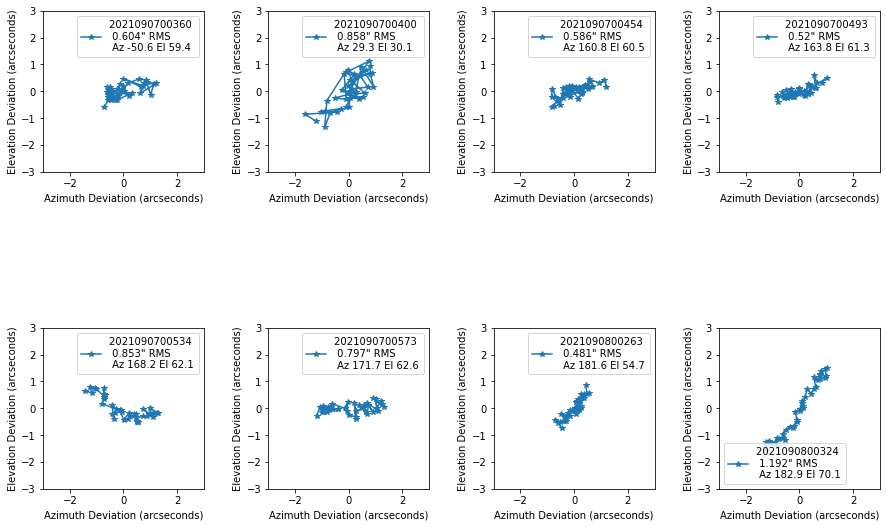

In [299]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plotcounter = 1
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
 
    plt.subplot(2,4,plotcounter, aspect=1.0)
    plt.plot(deviation[:,0], deviation[:,1], label = ('{} \n {}\" RMS \n Az {} El {}'.format(firstExpId, exposure[2], round(posData[firstExpId]['Azimuth'][0],1), round(posData[firstExpId]['Elevation'][0],1))), marker = '*')
    plt.xlim(-3,3)
    plt.xlabel("Azimuth Deviation (arcseconds)")
    plt.ylim(-3,3)
    plt.ylabel("Elevation Deviation (arcseconds)")    
    plt.legend()
    plotcounter += 1

# Azimuth Deviation vs. Azimuth

IndexError: list index out of range

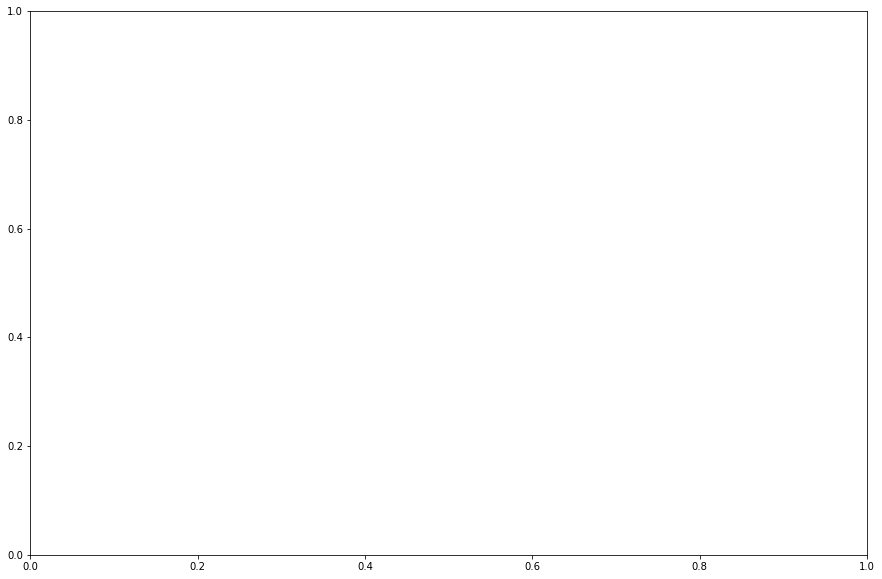

In [352]:

fig, ax = plt.subplots(figsize=(15,10))

for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
 
    
    ax.plot(posData[firstExpId]['Azimuth'],deviation[:,0], label = ('{} \t {}\" RMS_tot'.format(firstExpId, exposure[2])), marker = 'o')
    ax.set_ylabel("Azimuth Deviation (arcseconds)")    
    ax.set_xlabel("Azimuth")
    ax.legend()
    

    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter('{x:.0f}')

    ax.xaxis.set_minor_locator(MultipleLocator(5))



# Elevation Deviation vs. Azimuth

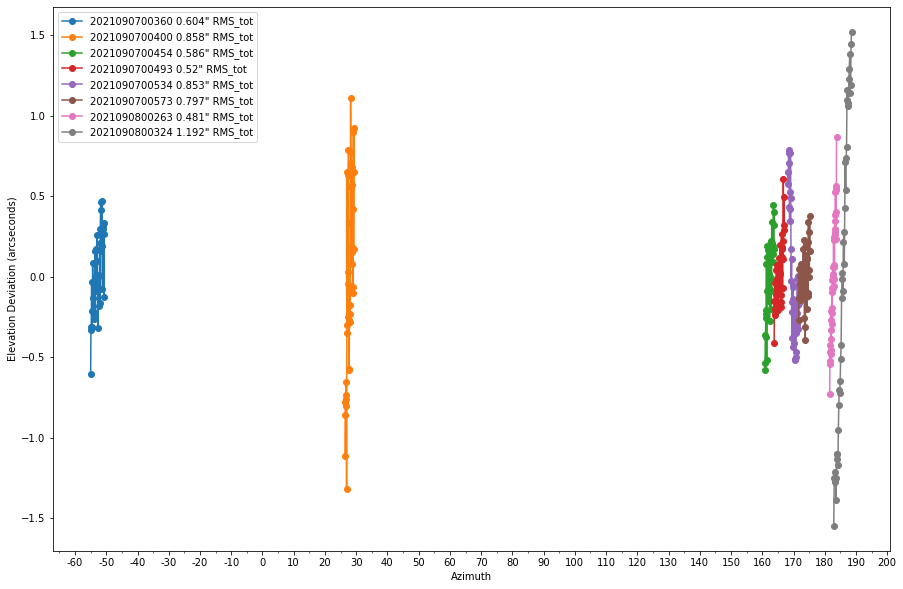

In [250]:

fig, ax = plt.subplots(figsize=(15,10))

for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
 
    
    ax.plot(posData[firstExpId]['Azimuth'],deviation[:,1], label = ('{} {}\" RMS_tot'.format(firstExpId, exposure[2])), marker = 'o')
    ax.set_ylabel("Elevation Deviation (arcseconds)")    
    ax.set_xlabel("Azimuth")
    ax.legend()
    

    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter('{x:.0f}')

    ax.xaxis.set_minor_locator(MultipleLocator(5))
    


In [297]:
start_time = Time(posData['2021090700360']['StartTime'][0], format='fits', scale='tai')
print(start_time)
time = start_time.datetime.day
fmt = mdates.DateFormatter("%H:%M")


2021-09-08T06:47:33.263


# Azimuth deviation vs. tracking time

IndexError: list index out of range

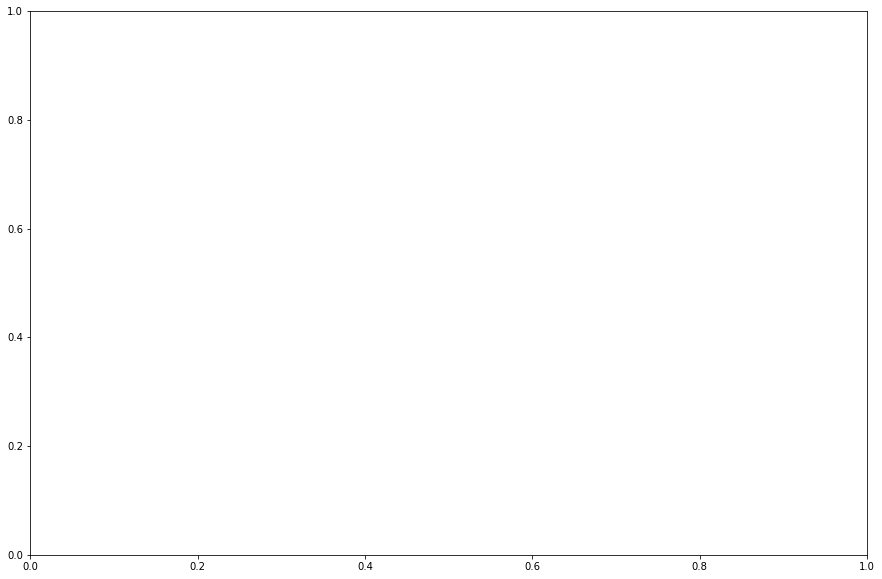

In [343]:
fig, ax = plt.subplots(figsize=(15,10))
    
for exposure in firstExpIds:
    firstExpId = str(exposure[0])
    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
    
    ax.plot(deviation[:,0], label = ('{} {}\" RMS_tot'.format(firstExpId, exposure[2])), marker = 'o')
    ax.set_ylabel("Azimuth Deviation (arcseconds)")    
    ax.set_xlabel("Time (min)")
    ax.legend()
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3.25))
    
    a=ax.get_xticks().tolist()
    a = [-10, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
    ax.set_xticklabels(a)
    # Time axis
    # Major ticks every 5 Hour.
    #loc_maj_ticks = mdates.HourLocator(interval=)
    #ax.xaxis.set_major_locator(loc_maj_ticks)

    # Minor ticks every 1 major
    #loc_major_ticks = mdates.MinuteLocator(interval=1)
    #ax.xaxis.major(loc_major_ticks)

    # Format Major 
    #fmt = mdates.DateFormatter("%H")
    #ax.xaxis.set_major_formatter(fmt)
    #fig.autofmt_xdate()


    #ax.tick_params(axis='x', which='major', bottom=False, top=False, labelbottom=False)
    # Labels and legend
    #plt.tick_params(axis='x', labelrotation=75)
plt.show()

# Elevation deviation vs. tracking time

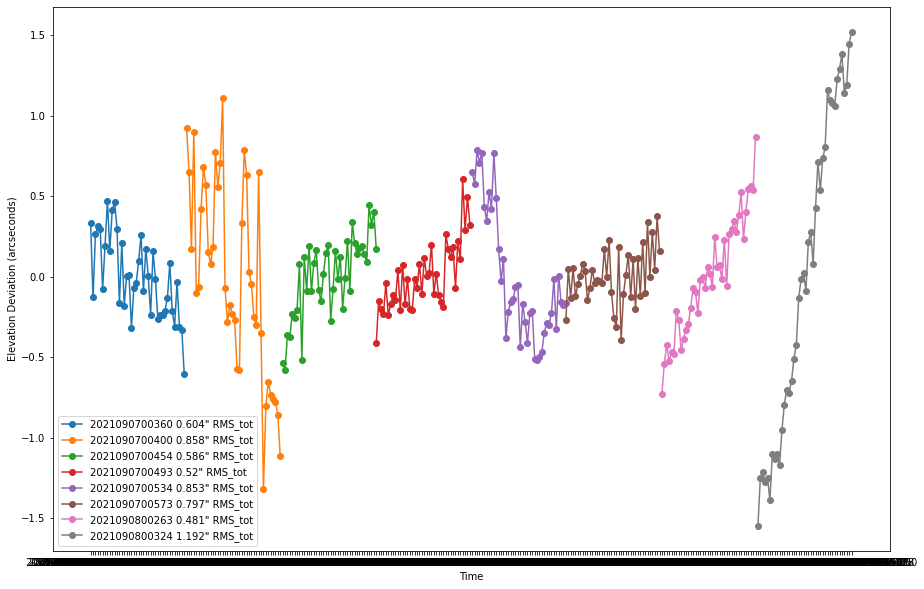

In [223]:
plt.figure(figsize=(15,10))
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
    plt.plot(posData[firstExpId]['StartTime'], deviation[:,1], label = ('{} {}\" RMS_tot'.format(firstExpId, exposure[2])),marker ='o')

    plt.ylabel("Elevation Deviation (arcseconds)")    
    plt.xlabel("Time")
    plt.legend()


RADEC deviation

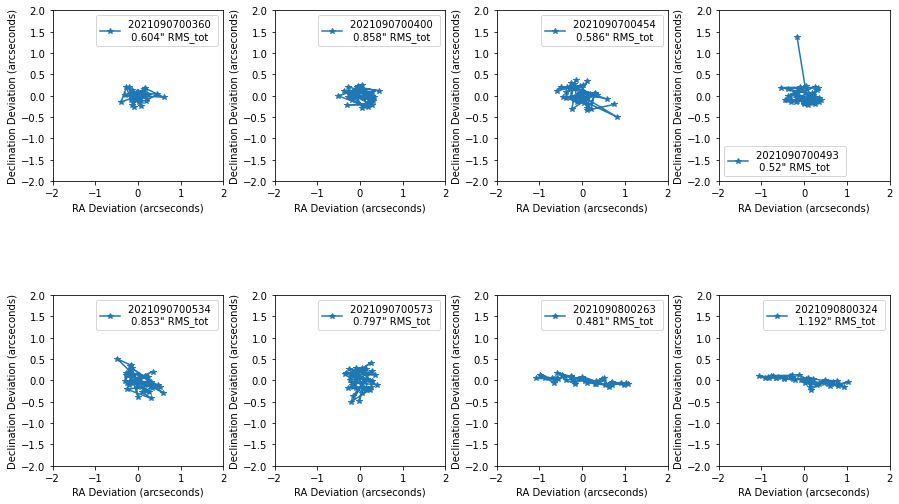

In [225]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.1,wspace=0.3)
plotcounter = 1
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    ras = np.array(posData[firstExpId]['RA'])
    decs = np.array(posData[firstExpId]['Dec'])
#     if firstExpId == 2021060900268:
#         print(ras)
#         print(decs)
    meanra = ras.mean()
    meandec = decs.mean()
    ra_deviation = (ras - meanra) * 3600.0
    dec_deviation = (decs - meandec) * 3600.0
    plt.subplot(2,4,plotcounter, aspect=1.0)
    plt.plot(ra_deviation, dec_deviation, label = ('{} \n {}\" RMS_tot'.format(firstExpId, exposure[2])),marker ='*')
    plt.xlim(-2,2)
    plt.xlabel("RA Deviation (arcseconds)")
    plt.ylim(-2,2)
    plt.ylabel("Declination Deviation (arcseconds)")    
    plt.legend()
    plotcounter += 1


# RA deviation vs. tracking time

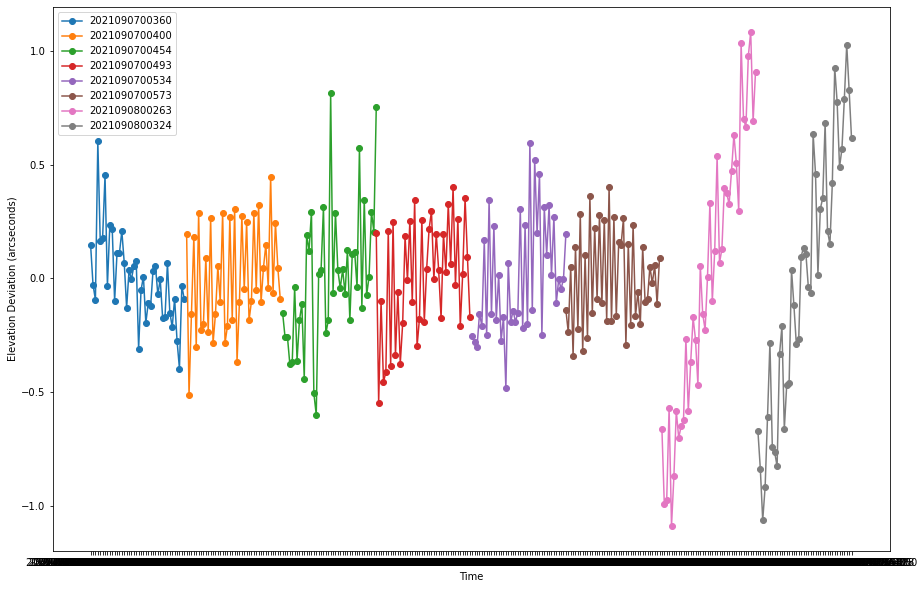

In [187]:
plt.figure(figsize=(15,10))
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    ras = np.array(posData[firstExpId]['RA'])
    decs = np.array(posData[firstExpId]['Dec'])
    meanra = ras.mean()
    meandec = decs.mean()
    ra_deviation = (ras - meanra) * 3600.0
    dec_deviation = (decs - meandec) * 3600.0    
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
    plt.plot(posData[firstExpId]['StartTime'], ra_deviation, label = str(firstExpId),marker ='o')

    plt.ylabel("Elevation Deviation (arcseconds)")    
    plt.legend()
    plt.xlabel("Time")


# DEC deviation vs. tracking time

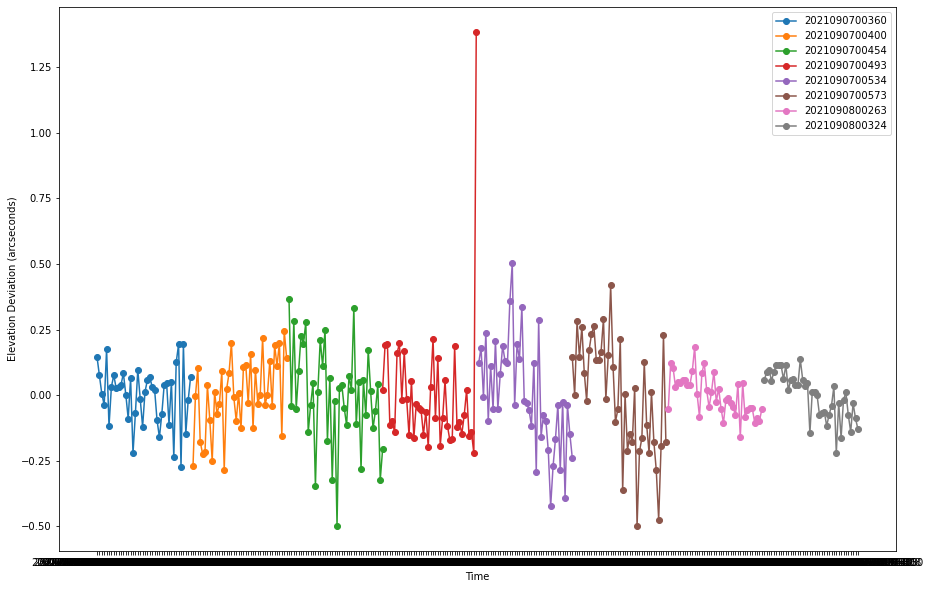

In [152]:
plt.figure(figsize=(15,10))
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    ras = np.array(posData[firstExpId]['RA'])
    decs = np.array(posData[firstExpId]['Dec'])
    meanra = ras.mean()
    meandec = decs.mean()
    ra_deviation = (ras - meanra) * 3600.0
    dec_deviation = (decs - meandec) * 3600.0    
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
    plt.plot(posData[firstExpId]['StartTime'], dec_deviation, label = str(firstExpId),marker ='o')

    plt.ylabel("Elevation Deviation (arcseconds)")    
    plt.legend()
    plt.xlabel("Time")


[258.23362101 258.19956177 258.1659847  258.13297403 258.09881711
 258.06814511 258.03500509 258.00533354 257.97457701 257.94427419
 257.91439975 257.88504698 257.85606184 257.82752689 257.79954476
 257.77177411 257.74470799 257.71806754 257.69173865 257.66584124
 257.64046895 257.61553998 257.59101138 257.56686266 257.54318352
 257.51986601 257.49701279 257.47465047 257.45271145 257.43115231
 257.40990877 257.38925774 257.36880727 257.34906884 257.32960347
 257.31028553 257.29182733 257.27337489 257.25558948 257.23815999]
257.68203365258125
[ 1985.71449694  1863.10122066  1742.2237575   1623.3853635
  1500.42044138  1390.00125381  1270.69716956  1163.879601
  1053.15607282   944.06594933   836.5179452    730.8479893
   626.50145997   523.77565187   423.03998385   323.06564328
   225.62760852   129.72200878    34.93798389   -58.29268984
  -149.63294473  -239.37721203  -327.68018414  -414.61557449
  -499.86048314  -583.80351239  -666.07510893  -746.57947246
  -825.55993719  -903.1728256

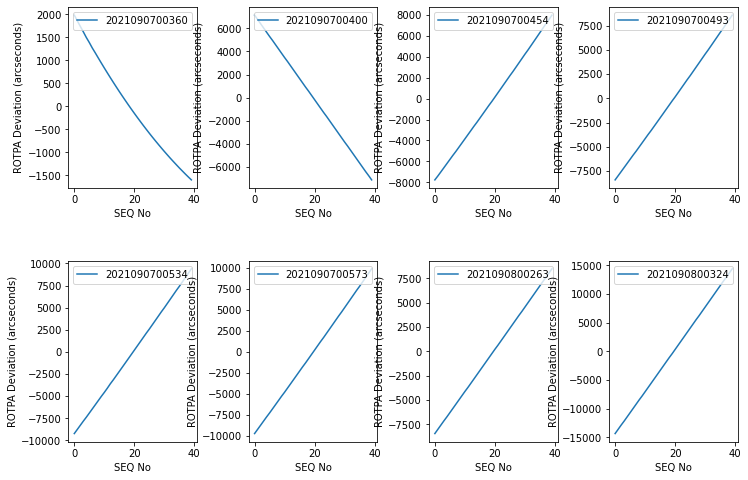

In [137]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plotcounter = 1
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    rotpas = np.array(posData[firstExpId]['ROTPA'])
    #print(rotpas)
    meanrotpa = rotpas.mean()
    #print(meanrotpa)
    rotpa_deviation = (rotpas - meanrotpa) * 3600.0
    #print(rotpa_deviation)
    plt.subplot(2,4,plotcounter)
    plt.plot(rotpa_deviation, label = str(firstExpId))
    #plt.xlim(-5,5)
    plt.xlabel("SEQ No")
    #plt.ylim(-5,5)
    plt.ylabel("ROTPA Deviation (arcseconds)")    
    plt.legend()
    plotcounter += 1


# Now the graphs with normalized to 10 minutes 

# Obtain centroids and deviation RMS for each test

In [47]:
firstExpIds = [[2021090700360,40], [2021090700400, 40], [2021090700454, 40], [2021090700493, 40], [2021090700534, 40], [2021090700573, 40], [2021090800263, 40], [2021090800324, 40]]

plateScale = exp.getWcs().getPixelScale().asArcseconds() # arcseconds/pixel
print(f"Tracking test \t Azimuth \t Elevation \t Duration (min) \t RMS Az \t RMS El \t RMS_tot")
for exposure in firstExpIds:
    firstExpId = str(exposure[0])
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    el = Angle(posData[firstExpId]['Elevation'][0] * u.deg)
    az = Angle(posData[firstExpId]['Azimuth'][0] * u.deg)
    dec = Angle(posData[firstExpId]['Dec'][0] * u.deg)
    rotpa = Angle(posData[firstExpId]['ROTPA'][0] * u.deg) 
    sinTheta =  np.cos(location.lat) / np.cos(dec) * np.sin(az)
    theta = Angle(np.arcsin(sinTheta))
    rotAzEl = rotpa - theta - Angle(90.0 * u.deg) 
    rotMatrix = np.array([[np.cos(rotAzEl), -np.sin(rotAzEl)], [np.sin(rotAzEl), np.cos(rotAzEl)]])
    for i in range(len(deviation)):
        deviation[i,:] = np.dot(rotMatrix,deviation[i,:])
   
    
    
    rms = np.sqrt((deviation * deviation).mean(axis=0))
    rms_tot = np.sqrt((rms * rms).sum())
    
    print(f"{firstExpId} \t {az:.1f} \t {el:.1f} \t {duration:.2f} \t\t\t {rms[0]:.3f} \t\t {rms[1]:.3f} \t\t {rms_tot:.3f}")
    
# print(az.deg, theta.deg, rotpa.deg, rotAzEl.deg)
#print(rms)

Tracking test 	 Azimuth 	 Elevation 	 Duration (min) 	 RMS Az 	 RMS El 	 RMS_tot
2021090700360 	 -50.6 deg 	 59.4 deg 	 13.25 			 0.416 		 0.441 		 0.606
2021090700400 	 29.3 deg 	 30.1 deg 	 12.50 			 0.371 		 0.774 		 0.858
2021090700454 	 160.8 deg 	 60.5 deg 	 12.49 			 0.549 		 0.206 		 0.586
2021090700493 	 163.8 deg 	 61.3 deg 	 12.50 			 0.501 		 0.139 		 0.520
2021090700534 	 168.2 deg 	 62.1 deg 	 12.53 			 0.688 		 0.505 		 0.853
2021090700573 	 171.7 deg 	 62.6 deg 	 12.50 			 0.778 		 0.172 		 0.797
2021090800263 	 181.6 deg 	 54.7 deg 	 12.52 			 0.115 		 0.467 		 0.481
2021090800324 	 182.9 deg 	 70.1 deg 	 12.53 			 0.187 		 1.177 		 1.192


In [113]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.7.0/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime', 'f', 'source', 'exp']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# What do the tracking errors look like? Elevation deviation vs. Azimuth Deviation

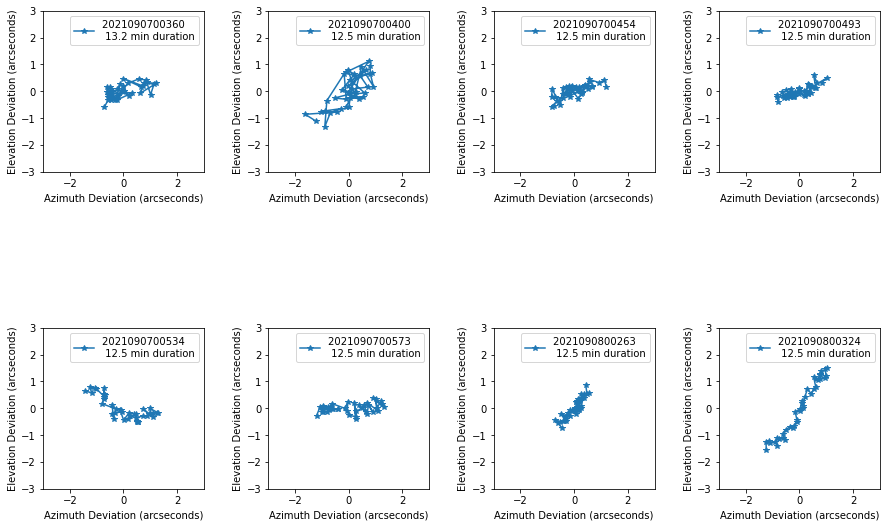

In [179]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plotcounter = 1
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
 
    plt.subplot(2,4,plotcounter, aspect=1.0)
    plt.plot(deviation[:,0], deviation[:,1], label = ('{} \n {} min duration'.format(firstExpId, round(duration,1))), marker = '*')
    plt.xlim(-3,3)
    plt.xlabel("Azimuth Deviation (arcseconds)")
    plt.ylim(-3,3)
    plt.ylabel("Elevation Deviation (arcseconds)")    
    plt.legend()
    plotcounter += 1

# Azimuth Deviation vs. Azimuth

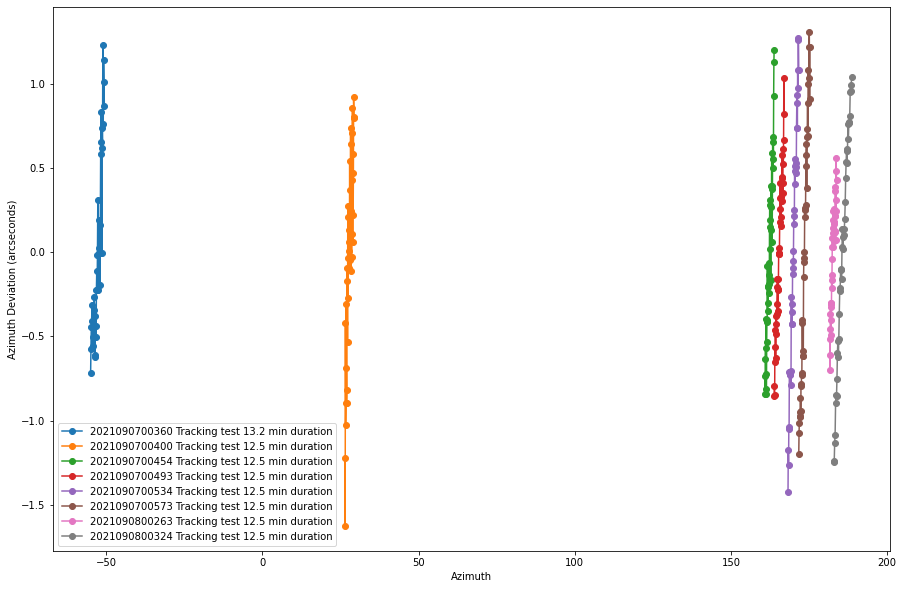

In [175]:
plt.figure(figsize=(15,10))
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
 
    
    plt.plot(posData[firstExpId]['Azimuth'],deviation[:,0], label = ('{} Tracking test {} min duration'.format(firstExpId, round(duration,1))), marker = 'o')
    plt.ylabel("Azimuth Deviation (arcseconds)")    
    plt.xlabel("Azimuth")
    plt.legend()
#posData[2021090700400]['Azimuth']

# Azimuth deviation vs. tracking time

In [1]:
plt.figure(figsize=(15,10))
for exposure in firstExpIds:
    firstExpId = str(exposure[0])
    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
    plt.plot(posData[firstExpId]['StartTime'], deviation[:,0], label = ('{} Tracking test {} min duration'.format(firstExpId, round(duration,1))), marker = 'o')
    #plt.minorticks_off()
    plt.tick_params(axis='x', which='major', bottom=False, top=False, labelbottom=False)
    plt.ylabel("Azimuth Deviation (arcseconds)")    
    plt.legend()
    plt.xlabel("Date")


NameError: name 'plt' is not defined

# Elevation deviation vs. tracking time

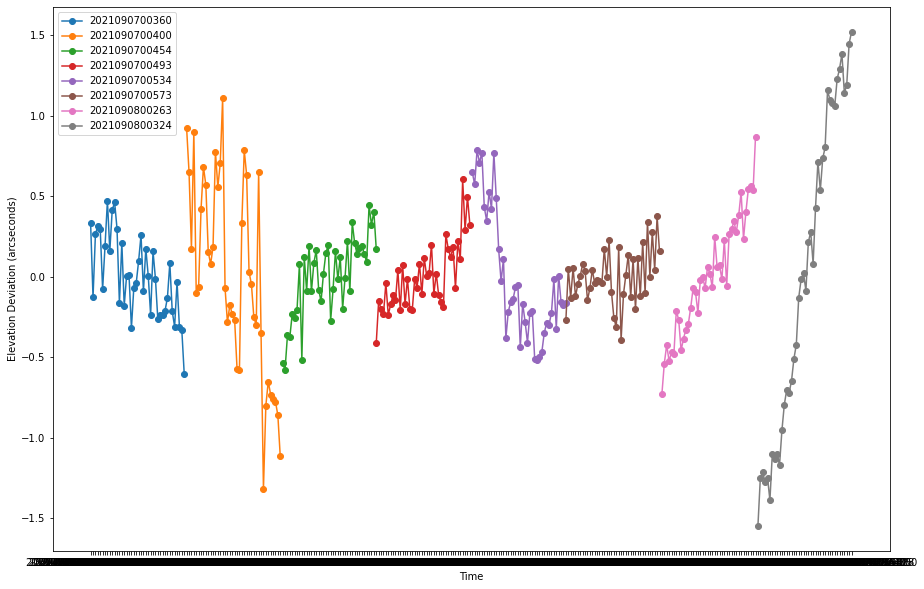

In [149]:
plt.figure(figsize=(15,10))
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    centroids = np.array(posData[firstExpId]['Centroids'])
    meanPosition = centroids.mean(axis=0)
    deviation = (centroids - meanPosition) * plateScale
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
    plt.plot(posData[firstExpId]['StartTime'], deviation[:,1], label = str(firstExpId),marker ='o')

    plt.ylabel("Elevation Deviation (arcseconds)")    
    plt.legend()
    plt.xlabel("Time")


RADEC deviation

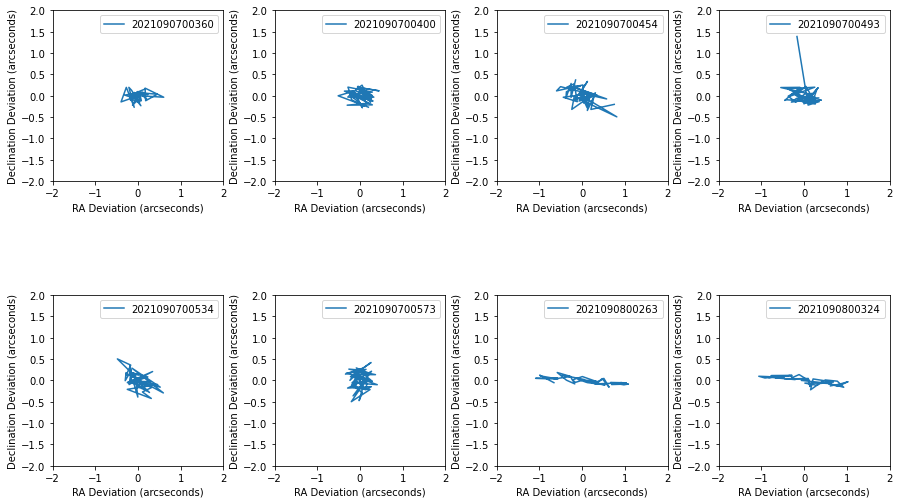

In [126]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.1,wspace=0.3)
plotcounter = 1
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    ras = np.array(posData[firstExpId]['RA'])
    decs = np.array(posData[firstExpId]['Dec'])
#     if firstExpId == 2021060900268:
#         print(ras)
#         print(decs)
    meanra = ras.mean()
    meandec = decs.mean()
    ra_deviation = (ras - meanra) * 3600.0
    dec_deviation = (decs - meandec) * 3600.0
    plt.subplot(2,4,plotcounter, aspect=1.0)
    plt.plot(ra_deviation, dec_deviation, label = str(firstExpId))
    plt.xlim(-2,2)
    plt.xlabel("RA Deviation (arcseconds)")
    plt.ylim(-2,2)
    plt.ylabel("Declination Deviation (arcseconds)")    
    plt.legend()
    plotcounter += 1


# RA deviation vs. tracking time

In [17]:
plt.figure(figsize=(15,10))
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    ras = np.array(posData[firstExpId]['RA'])
    decs = np.array(posData[firstExpId]['Dec'])
    meanra = ras.mean()
    meandec = decs.mean()
    ra_deviation = (ras - meanra) * 3600.0
    dec_deviation = (decs - meandec) * 3600.0    
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
    plt.plot(posData[firstExpId]['StartTime'], ra_deviation, label = str(firstExpId),marker ='o')

    plt.ylabel("Elevation Deviation (arcseconds)")    
    plt.legend()
    plt.xlabel("Time")


KeyError: '2021090700298'

<Figure size 1080x720 with 0 Axes>

# DEC deviation vs. tracking time

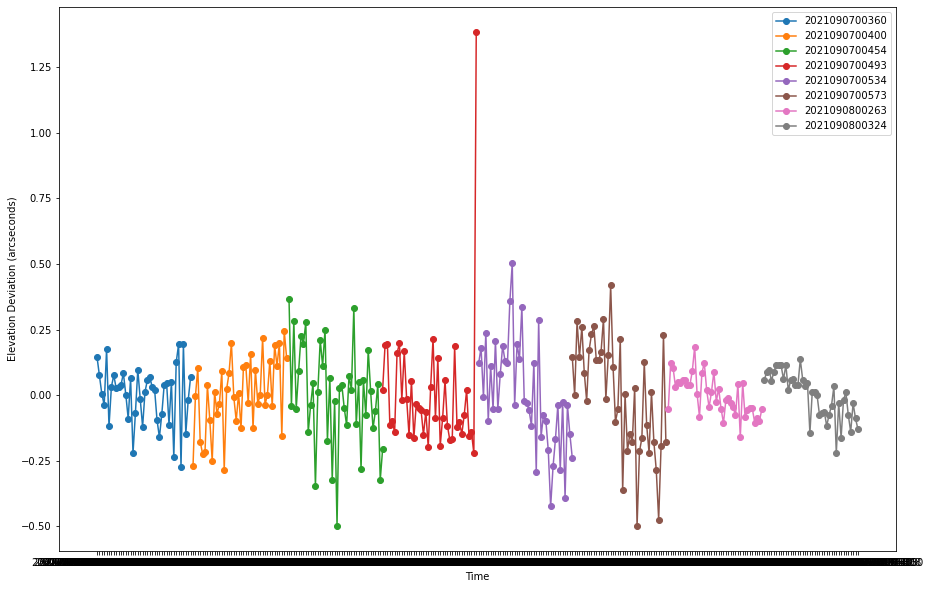

In [152]:
plt.figure(figsize=(15,10))
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    ras = np.array(posData[firstExpId]['RA'])
    decs = np.array(posData[firstExpId]['Dec'])
    meanra = ras.mean()
    meandec = decs.mean()
    ra_deviation = (ras - meanra) * 3600.0
    dec_deviation = (decs - meandec) * 3600.0    
    start_time = Time(posData[firstExpId]['StartTime'][0], format='fits', scale='tai')
    end_time = Time(posData[firstExpId]['EndTime'][-1], format='fits', scale='tai')
    duration = TimeDelta(end_time - start_time, format='sec').value/60
    plt.plot(posData[firstExpId]['StartTime'], dec_deviation, label = str(firstExpId),marker ='o')

    plt.ylabel("Elevation Deviation (arcseconds)")    
    plt.legend()
    plt.xlabel("Time")


[258.23362101 258.19956177 258.1659847  258.13297403 258.09881711
 258.06814511 258.03500509 258.00533354 257.97457701 257.94427419
 257.91439975 257.88504698 257.85606184 257.82752689 257.79954476
 257.77177411 257.74470799 257.71806754 257.69173865 257.66584124
 257.64046895 257.61553998 257.59101138 257.56686266 257.54318352
 257.51986601 257.49701279 257.47465047 257.45271145 257.43115231
 257.40990877 257.38925774 257.36880727 257.34906884 257.32960347
 257.31028553 257.29182733 257.27337489 257.25558948 257.23815999]
257.68203365258125
[ 1985.71449694  1863.10122066  1742.2237575   1623.3853635
  1500.42044138  1390.00125381  1270.69716956  1163.879601
  1053.15607282   944.06594933   836.5179452    730.8479893
   626.50145997   523.77565187   423.03998385   323.06564328
   225.62760852   129.72200878    34.93798389   -58.29268984
  -149.63294473  -239.37721203  -327.68018414  -414.61557449
  -499.86048314  -583.80351239  -666.07510893  -746.57947246
  -825.55993719  -903.1728256

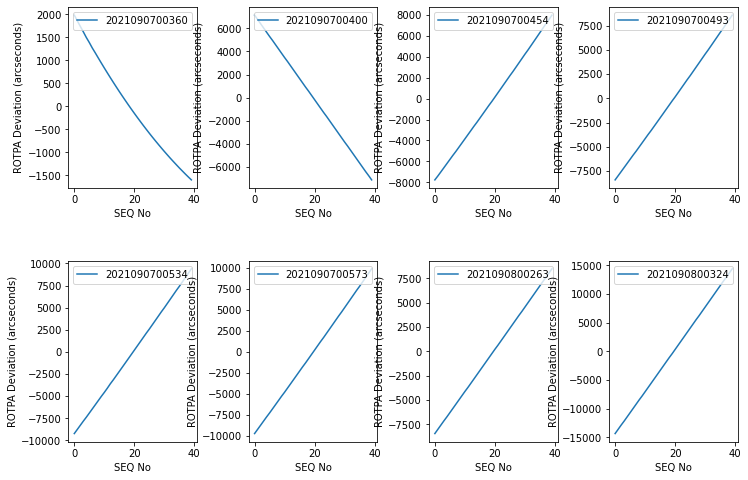

In [137]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plotcounter = 1
for exposure in firstExpIds:
    firstExpId = str(exposure[0])

    rotpas = np.array(posData[firstExpId]['ROTPA'])
    #print(rotpas)
    meanrotpa = rotpas.mean()
    #print(meanrotpa)
    rotpa_deviation = (rotpas - meanrotpa) * 3600.0
    #print(rotpa_deviation)
    plt.subplot(2,4,plotcounter)
    plt.plot(rotpa_deviation, label = str(firstExpId))
    #plt.xlim(-5,5)
    plt.xlabel("SEQ No")
    #plt.ylim(-5,5)
    plt.ylabel("ROTPA Deviation (arcseconds)")    
    plt.legend()
    plotcounter += 1
